In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("HR Data.csv")

In [4]:
df.describe()
df.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

In [4]:
df.isnull().sum()
df.info()
df['Emp ID'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emp ID                  50000 non-null  int64  
 1   Name Prefix             50000 non-null  object 
 2   First Name              50000 non-null  object 
 3   Middle Initial          50000 non-null  object 
 4   Last Name               50000 non-null  object 
 5   Gender                  50000 non-null  object 
 6   E Mail                  50000 non-null  object 
 7   Father's Name           50000 non-null  object 
 8   Mother's Name           50000 non-null  object 
 9   Mother's Maiden Name    50000 non-null  object 
 10  Date of Birth           50000 non-null  object 
 11  Time of Birth           50000 non-null  object 
 12  Age in Yrs.             50000 non-null  float64
 13  Weight in Kgs.          50000 non-null  int64  
 14  Date of Joining         50000 non-null

dtype('int64')

In [5]:
#df['Emp ID'] = str(df['Emp ID'])
#df['Zip'] = str(df['Zip'])
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Emp ID                  50000 non-null  int64         
 1   Name Prefix             50000 non-null  object        
 2   First Name              50000 non-null  object        
 3   Middle Initial          50000 non-null  object        
 4   Last Name               50000 non-null  object        
 5   Gender                  50000 non-null  object        
 6   E Mail                  50000 non-null  object        
 7   Father's Name           50000 non-null  object        
 8   Mother's Name           50000 non-null  object        
 9   Mother's Maiden Name    50000 non-null  object        
 10  Date of Birth           50000 non-null  datetime64[ns]
 11  Time of Birth           50000 non-null  object        
 12  Age in Yrs.             50000 non-null  float6

In [5]:
columns_reduce =  ['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father\'s Name', 'Mother\'s Name',
       'Mother\'s Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining','Short Month', 'Day of Joining',
       'DOW of Joining', 'Age in Company (Years)', 'Salary',
       'Last % Hike','Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Region', 'User Name']

In [7]:
df.nunique()

Emp ID                    48675
Name Prefix                   7
First Name                 5154
Middle Initial               26
Last Name                 17537
Gender                        2
E Mail                    49998
Father's Name             49981
Mother's Name             50000
Mother's Maiden Name      17483
Date of Birth             13825
Time of Birth             37835
Age in Yrs.                3901
Weight in Kgs.               51
Date of Joining           11101
Quarter of Joining            4
Half of Joining               2
Year of Joining              40
Month of Joining             12
Month Name of Joining        12
Short Month                  12
Day of Joining               31
DOW of Joining                7
Short DOW                     7
Age in Company (Years)     3617
Salary                    43005
Last % Hike                  31
SSN                       49926
Phone No.                 50000
Place Name                14552
County                     2465
City    

In [6]:
df.nunique()
df.shape
df2 = df[columns_reduce]
df2.shape

(50000, 32)

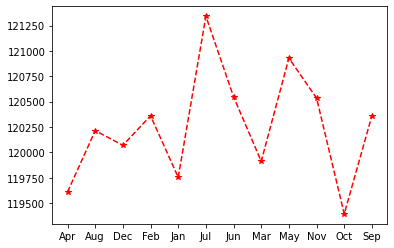

In [12]:
df3 = df.groupby(['Short Month']).agg({'Emp ID':'count', 'Salary':'mean'}).reset_index()
df3
plt.plot(df3['Short Month'], df3['Salary'], 'r*', linestyle = "--")

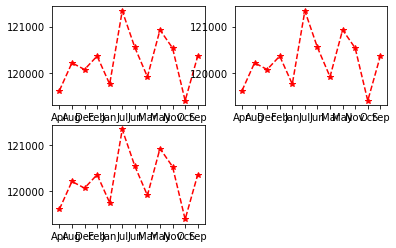

In [58]:
plt.subplot(2,2,1)
plt.plot(df3['Short Month'], df3['Salary'], 'r*', linestyle = "--")
plt.subplot(2,2,2)
plt.plot(df3['Short Month'], df3['Salary'], 'r*', linestyle = "--")
plt.subplot(2,2,3)
plt.plot(df3['Short Month'], df3['Salary'], 'r*', linestyle = "--")

<BarContainer object of 50 artists>

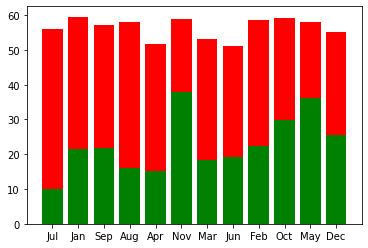

In [21]:
df4 = df.head(50)
plt.bar(df4['Short Month'],df4['Age in Yrs.'],color=["r"])
plt.bar(df4['Short Month'],df4['Age in Company (Years)'], color=["g"])

(array([17.,  6., 10.,  7.,  6.,  1.,  1.,  2.]),
 array([2.00000e-02, 4.73750e+00, 9.45500e+00, 1.41725e+01, 1.88900e+01,
        2.36075e+01, 2.83250e+01, 3.30425e+01, 3.77600e+01]),
 <BarContainer object of 8 artists>)

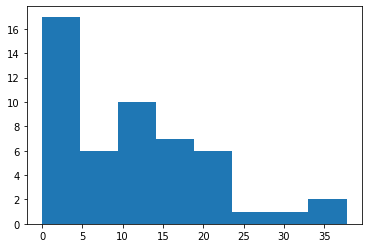

In [23]:
plt.hist(df4['Age in Company (Years)'], bins = 8)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b49afcdd30>,
 'caps': [<matplotlib.lines.Line2D at 0x1b49afdb7f0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1b49afbad00>],
 'medians': [<matplotlib.lines.Line2D at 0x1b49afec550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b49affccd0>],
 'means': []}

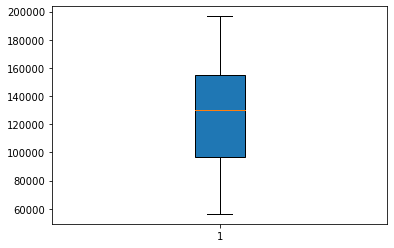

In [98]:
plt.boxplot(df4['Salary'], patch_artist=True)

([<matplotlib.patches.Wedge at 0x1b49d0f8820>,
 [Text(1.0943302849623529, 0.11154025019792546, 'Jul'),
  Text(0.7988369875092478, 0.756213903196146, 'Jan'),
  Text(0.04066596996065201, 1.0992480515730558, 'Sep'),
  Text(-0.4630767185395555, 0.9977775066349398, 'Aug'),
  Text(-0.842272175391373, 0.7075150758545604, 'Apr'),
  Text(-1.0942039808444934, 0.11277255119958861, 'Aug'),
  Text(-0.7849836690580985, -0.7705846087952224, 'Nov'),
  Text(-0.12253272178284505, -1.0931540294452964, 'Nov'),
  Text(0.7081291319217443, -0.8417559815788404, 'Mar'),
  Text(1.0897344309416876, -0.14992955019006954, 'Apr')],
 [Text(0.5969074281612833, 0.060840136471595696, '3.2%'),
  Text(0.43572926591413513, 0.4124803108342614, '17.7%'),
  Text(0.022181438160355643, 0.5995898463125758, '7.0%'),
  Text(-0.25258730102157567, 0.5442422763463307, '8.0%'),
  Text(-0.4594211865771125, 0.3859173141024875, '6.0%'),
  Text(-0.5968385350060872, 0.061512300654321055, '13.0%'),
  Text(-0.4281729103953264, -0.4203188775

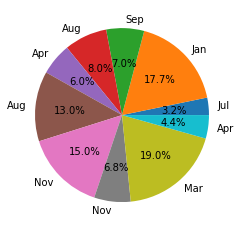

In [115]:
df5 = df.head(10)
plt.pie(df5['Emp ID'], labels=df5['Short Month'], autopct='%1.1f%%')